# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

A_invert = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1],
[4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1],
])

clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY)


<ipython-input-2-cc4d36eec899>:28: RuntimeWarning: overflow encountered in ubyte_scalars
  Axy = int(img[i2,j2] - img[i3,j1] - img[i1,j3] + img[i1,j1])/4
<ipython-input-2-cc4d36eec899>:31: RuntimeWarning: overflow encountered in ubyte_scalars
  Bxy = int(img[i2,j4] - img[i3,j2] - img[i1,j1] + img[i1,j2])/4
<ipython-input-2-cc4d36eec899>:34: RuntimeWarning: overflow encountered in ubyte_scalars
  Cxy = int(img[i4,j4] - img[i1,j2] - img[i2,j1] + img[i2,j2])/4
<ipython-input-2-cc4d36eec899>:37: RuntimeWarning: overflow encountered in ubyte_scalars
  Dxy = int(img[i4,j2] - img[i1,j1] - img[i2,j3] + img[i2,j1])/4
<ipython-input-2-cc4d36eec899>:32: RuntimeWarning: overflow encountered in ubyte_scalars
  Cx = int(img[i4,j2] - img[i3,j2])/2
<ipython-input-2-cc4d36eec899>:35: RuntimeWarning: overflow encountered in ubyte_scalars
  Dx = int(img[i4,j1] - img[i3,j1])/2
<ipython-input-2-cc4d36eec899>:33: RuntimeWarning: overflow encountered in ubyte_scalars
  Cy = int(img[i2,j4] - img[i2,j3])/2
<ip

Skala:  1.5 ,  1.5


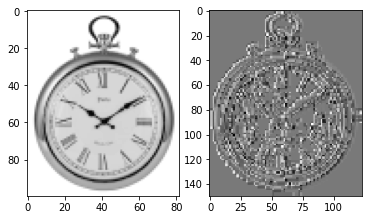

In [2]:
#TODO Do samodzielnej implementacji
def bilinear_interpolation(img, x_scale, y_scale):
    (X,Y) = img.shape
    newX = round(X*x_scale)
    newY = round(Y*y_scale)
    new_img = np.zeros((newX,newY))
    for i in range(newX):
        for j in range(newY):
            i1 = min(round(i/x_scale),X-1)
            j1 = min(round(j/y_scale),Y-1)
            i2 = min(round(i/x_scale)+1,X-2)
            j2 = min(round(j/y_scale)+1,Y-2)
            i3 = max(round(i/x_scale)-1,0)
            j3 = max(round(j/y_scale)-1,0)
            i4 = min(round(i/x_scale)+2,X-3)
            j4 = min(round(j/y_scale)+2,Y-3)
            
            A = img[i1,j1]
            B = img[i1,j2]
            C = img[i2,j2]
            D = img[i2,j1]
                
                
                
            
            Ax = (img[i2,j1] - img[i3,j1])/2
            Ay = int(img[i1,j2] - img[i1,j3])/2
            Axy = int(img[i2,j2] - img[i3,j1] - img[i1,j3] + img[i1,j1])/4
            Bx = int(img[i2,j2] - img[i3,j2])/2
            By = int(img[i1,j4] - img[i1,j3])/2
            Bxy = int(img[i2,j4] - img[i3,j2] - img[i1,j1] + img[i1,j2])/4
            Cx = int(img[i4,j2] - img[i3,j2])/2
            Cy = int(img[i2,j4] - img[i2,j3])/2
            Cxy = int(img[i4,j4] - img[i1,j2] - img[i2,j1] + img[i2,j2])/4
            Dx = int(img[i4,j1] - img[i3,j1])/2
            Dy = int(img[i2,j2] - img[i2,j3])/2
            Dxy = int(img[i4,j2] - img[i1,j1] - img[i2,j3] + img[i2,j1])/4
            
            x = np.array([A, B, C, D, Ax, Bx, Cx, Dx, Ay, By, Cy, Dy, Axy, Bxy, Cxy, Dxy]).transpose()

            ulamX = round(i/x_scale) - i1
            ulamY = round(j/y_scale) - j1
        
            a = np.dot(x,A_invert)
#             print(x)
    
#             print(a)
#             print(ulamX)
#             print(ulamY)

            
#             a = x.transpose()*A_invert
            
            for t in range(4):
                for y in range(4):
                    new_img[i,j] += a[4*t+y] * ulamX**t * ulamY**y
#                     print(new_img[i,j])
#             return
#             new_img[i,j] = a.sum()/9
            
                
            
    f,a = plt.subplots(1,2)
    print("Skala: " ,x_scale ,", " , y_scale)
    a[0].imshow(img,'gray')
    a[1].imshow(new_img,'gray')
    plt.show()
    
bilinear_interpolation(clock,1.5,1.5)
    
